In [1]:
import numpy as np
import pandas as pd
import os

import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
clean_CMO = "../dataset/clean_CMO.csv"
clean_monthly = "../dataset/clean_monthly.csv"

In [3]:
CMO = pd.read_csv(clean_CMO, sep='\t')
monthly = pd.read_csv(clean_monthly, sep='\t')
CMO = CMO.drop('Unnamed: 0', axis=1)
monthly = monthly.drop('Unnamed: 0', axis=1)

In [4]:
train1 = monthly.drop(['min_price', 'max_price', 'modal_price', 'state_name'],axis=1)

In [5]:
labels = monthly['modal_price']

In [8]:
from sklearn.cross_validation import train_test_split

x_train , x_test , y_train , y_test = train_test_split(train1 , labels , test_size = 0.20, random_state=2)

In [9]:
from sklearn import ensemble
gbr = ensemble.GradientBoostingRegressor(n_estimators = 250, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

In [10]:
gbr.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=250, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [11]:
gbr.score(x_test,y_test)

0.8104239171393619

In [12]:
params = {'n_estimators':250, 'max_depth':5, 'min_samples_split':2,
          'learning_rate':0.1, 'loss':'ls'}

In [14]:
t_sc = np.zeros((params['n_estimators']),dtype=np.float64)
for i,y_pred in enumerate(gbr.staged_predict(x_test)):
    t_sc[i]=gbr.loss_(y_test,y_pred)
testsc = np.arange((params['n_estimators']))+1

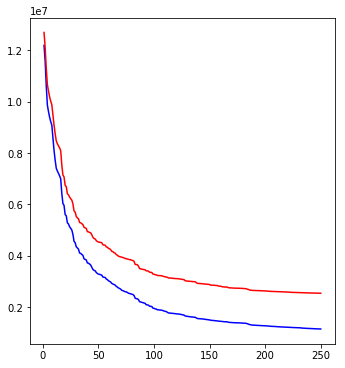

In [15]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(testsc,gbr.train_score_,'b-',label= 'Set dev train')
plt.plot(testsc,t_sc,'r-',label = 'set dev test')